Let's try to move on to more complex images. The fashion MNIST dataset is a bit too simplistic? or maybe too standardized. Let's move on to a bit complex data.

In [2]:
# Download  the dataset and store the zip file in the path /tmp/horse-or-human.zip

!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip


--2019-07-17 07:27:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  86.8MB/s    in 1.6s    

2019-07-17 07:27:24 (86.8 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image  as matplotimg
import math
import tensorflow as tf
import numpy as np


In [0]:
local_zip = '/tmp/horse-or-human.zip'     # get a variable for path to your zip
zip_reference = zipfile.ZipFile(local_zip,'r') # get a reference to the zipfile object using the zipfile library 'r'  for recursiveley i.e. all sub files/folders
zip_reference.extractall('/tmp/horse-or-human') # extract the files in the referenced zip to the specified location
zip_reference.close()  # close the file reference stream at the end  

You can verify that your images extracted successfully in the subdirectory. 

Now let's explore the dataset directory a bit

In [0]:
training_horse_directory = os.path.join('/tmp/horse-or-human/horses')  # Horse training-set directory

training_human_directory = os.path.join('/tmp/horse-or-human/humans')  # Human training-set directory

In [5]:
# Let's look at the names of files in the directories

training_horse_names = os.listdir(training_horse_directory)
print(training_horse_names[:10])

training_human_names = os.listdir(training_human_directory)
print(training_human_names[:10])


['horse06-4.png', 'horse39-6.png', 'horse32-0.png', 'horse13-8.png', 'horse03-3.png', 'horse17-9.png', 'horse18-1.png', 'horse13-3.png', 'horse07-8.png', 'horse11-2.png']
['human08-00.png', 'human07-27.png', 'human07-20.png', 'human05-27.png', 'human16-30.png', 'human11-18.png', 'human05-16.png', 'human03-20.png', 'human05-04.png', 'human11-26.png']


In [6]:
print('total training horse images:', len(os.listdir(training_horse_directory)))
print('total training human images:', len(os.listdir(training_human_directory)))

total training horse images: 500
total training human images: 527


In [0]:
# Visualize a few Images
def print_random_images(number_of_images):
  # Rows and columns of our plot
  number_of_cols = 4
  number_of_rows = math.ceil( (number_of_images * 2 )/ 4)
  

  images_index = 0 # to iterate over images


  fig = plt.gcf()
  fig.set_size_inches(number_of_cols * 4,number_of_rows * 4)

  images_index += number_of_images

  # create array of image paths using training directories and file names

  next_horse_pic = [os.path.join(training_horse_directory,fname)  for fname in training_horse_names[images_index-number_of_images:images_index]]

  next_human_pic = [os.path.join(training_human_directory,fname)  for fname in training_human_names[images_index-number_of_images:images_index]]

  # iterate over file names and then read and plot them
  for i,img_path in enumerate(next_horse_pic + next_human_pic):
    # Set up the subplot. It's indices start at 1
    sp = plt.subplot(number_of_rows,number_of_cols, i+1)
    sp.axis('Off') # to turn off axis and gridlines

    img = matplotimg.imread(img_path)
    #print(img.shape)
    plt.imshow(img)

  plt.show()

(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)


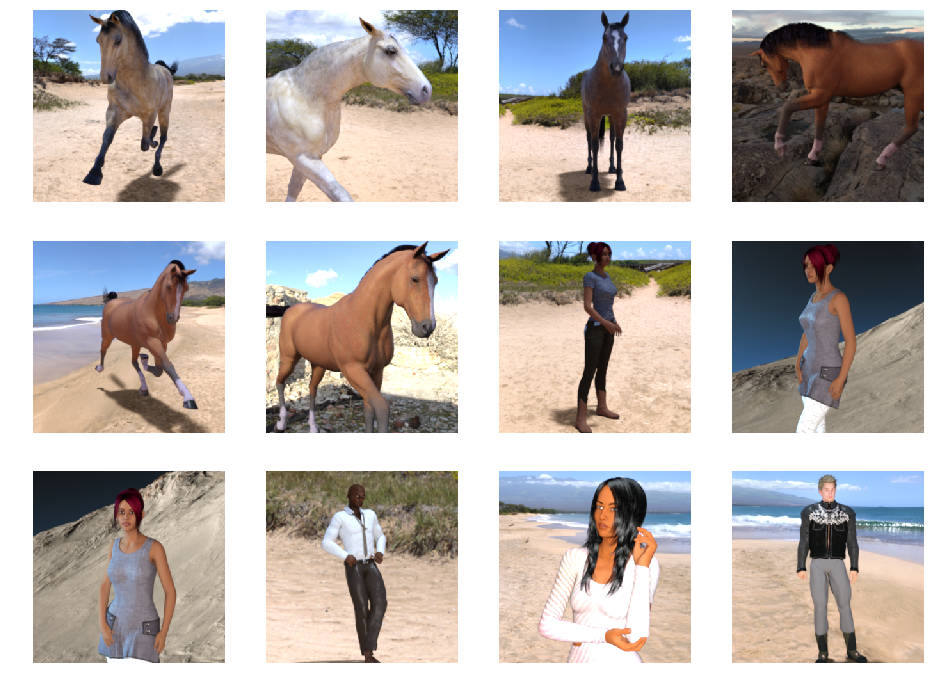

In [8]:
print_random_images(6) # displays nums x2 images (num/2 from horses and nums/2 from humans)

Define a Model to classify the images!!



In [0]:
def create__classifier(input_dims):
  model = tf.keras.models.Sequential()
  
  # Conv1
  model.add(tf.keras.layers.Conv2D(16,(1,1),activation='relu', input_shape=input_dims))  # Extra layer so that network learns how best to reduce the aplha channel (1x1 filter for that reason)
  
  model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
  
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  # Conv 2
  model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
  
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  
  # Conv3
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  
  # Conv4
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  
  # Conv5
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
  
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  
  # Flatten results to feed them into a Dense Layer
  model.add(tf.keras.layers.Flatten())
  
  # Add a dense layer with 512 neurons
  model.add(tf.keras.layers.Dense(512,activation='relu'))
  
  #Add a output layer  only 1  neuron as result either 0 or 1
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  
  return model

In [0]:
class accuracyCheckCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')> 0.97):
      print('Accuracy over 97%. So stopping Training!!')
      self.model.stop_training = True

callback = accuracyCheckCallback()

In [12]:
model = create__classifier((300,300,3))
model.summary()
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])

W0717 07:28:31.298287 140007868704640 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0717 07:28:31.582101 140007868704640 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 298, 298, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images will be rescaled by 1./255
training_data_generator = ImageDataGenerator(rescale=1./255)

# Fill data Generator with images from the directory using training_data_generator

training_generator = training_data_generator.flow_from_directory('/tmp/horse-or-human',
                                                                target_size=(300,300),
                                                                batch_size=128,
                                                                 # 2 classes binary crossentropy loss
                                                                class_mode='binary')

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit_generator(training_generator,
                             steps_per_epoch= 8,
                             epochs=15,
                             
                                  verbose=1)

Epoch 1/15
8/8 [==============================] - 14s 2s/step - loss: 0.7729 - acc: 0.5562
Epoch 2/15
8/8 [==============================] - 7s 931ms/step - loss: 0.6254 - acc: 0.6073
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.5769 - acc: 0.7998
Epoch 4/15
8/8 [==============================] - 7s 821ms/step - loss: 0.2602 - acc: 0.8876
Epoch 5/15
8/8 [==============================] - 8s 962ms/step - loss: 0.1875 - acc: 0.9210
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.1963 - acc: 0.9326
Epoch 7/15
8/8 [==============================] - 8s 960ms/step - loss: 0.1899 - acc: 0.9021
Epoch 8/15
8/8 [==============================] - 8s 957ms/step - loss: 0.3923 - acc: 0.9021
Epoch 9/15
8/8 [==============================] - 8s 959ms/step - loss: 0.1321 - acc: 0.9555
Epoch 10/15
8/8 [==============================] - 8s 967ms/step - loss: 0.1541 - acc: 0.9399
Epoch 11/15
8/8 [==============================] - 8s 954ms/step - loss: 0.04

# Let's try to train the model without ImgDataGenerator

In [0]:
# Let's try to load our images from the directory and train without using image generators!
import skimage
def load_images(root_data_directory):
  
  # lists to store Images and labels
  images = [[],[]]
  labels = [[],[]]
  log_index = 0
  directory_index = 0
  # get list of all directories present in the data_directory path
  directories = [dir for dir in os.listdir(root_data_directory)
                 if os.path.isdir(os.path.join(root_data_directory,dir))] # to make sure that we include only directories and not any files present in the folder
  print(len(directories))
  for dir in directories:
    current_directory = os.path.join(root_data_directory,dir)
    # Gather all fileNames in the given directory to load images into images array using sklearn
    file_names = [os.path.join(current_directory,file) 
                  for file in os.listdir(current_directory)
                 ]
    
    # Load all given Images into the Images array
    for file in file_names:
      images[directory_index].append(skimage.data.imread(file))
      labels[directory_index].append(directory_index)
      log_index+=1
      # print('Loading File: {0}'.format(log_index))
    directory_index+=1
  
  print('Successfully Loadded  {0} directories!'.format(len(images)))
  return (np.array(images[0]),np.array(labels[0])),(np.array(images[1]),np.array(labels[1]))

In [21]:
(train_horses_data,train_horse_labels), (train_human_data,train_human_labels) = load_images('/tmp/horse-or-human')
print(train_horses_data.shape)
print(train_horse_labels.shape)


2
Successfully Loadded  2 images!
(527, 300, 300, 4)
(527,)


In [22]:
print('Horse Data Shape:{}'.format(train_horses_data.shape))
print('Human Data Shape:{}'.format(train_human_data.shape))
print('Horse Data labels:{}'.format(train_horse_labels[:10]))
#plt.imshow(train_horses_data[0])
#plt.show()


Horse Data Shape:(527, 300, 300, 4)
Human Data Shape:(500, 300, 300, 4)
Horse Data labels:[0 0 0 0 0 0 0 0 0 0]


In [23]:
# Prepare Data
images = np.concatenate((train_horses_data,train_human_data),axis=0)
print(images.shape)
labels = np.concatenate((train_horse_labels,train_human_labels),axis=0)

# Shuffle the data
idx = np.random.permutation(len(images))
images,labels = images[idx], labels[idx]

#images = np.reshape(images,(1027,300,300,3))
print(images.shape)

# Split into test_data and training_data
img_split = np.split(images,[len(images)-100])
label_split = np.split(labels,[len(labels)-100])
training_images = img_split[0]
test_images =  img_split[1]
training_labels = label_split[0]
test_labels = label_split[1]
print('training_images shape:{}, Training Labels shape: {}'.format(training_images.shape,training_labels.shape))
print('testing images shape:{}, Testing Labels shape: {}'.format(test_images.shape,test_labels.shape))
print('Labels example:{} '.format(labels[:10]))
print('Labels shape:{}'.format(labels.shape))

(1027, 300, 300, 4)
(1027, 300, 300, 4)
training_images shape:(927, 300, 300, 4), Training Labels shape: (927,)
testing images shape:(100, 300, 300, 4), Testing Labels shape: (100,)
Labels example:[0 0 0 0 1 0 0 0 1 0] 
Labels shape:(1027,)


In [26]:
model_yeehaw = create__classifier((300,300,4))# 4 channels as png images have an extra channel for alpha
model_yeehaw.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_yeehaw.fit(training_images,training_labels,epochs = 15,callbacks=[callback])

Epoch 1/15
927/927 [==============================] - 9s 10ms/sample - loss: 4.3882 - acc: 0.6893
Epoch 2/15
927/927 [==============================] - 7s 7ms/sample - loss: 0.1934 - acc: 0.9266
Epoch 3/15
927/927 [==============================] - 7s 7ms/sample - loss: 0.0948 - acc: 0.9655
Epoch 4/15
927/927 [==============================] - 7s 7ms/sample - loss: 0.0539 - acc: 0.9827


In [27]:
test_loss,test_accuracy = model_yeehaw.evaluate(test_images,test_labels)
print('Test loss: {}, Test Accuracy: {}'.format(test_loss,test_accuracy * 100))

100/100 [==============================] - 1s 6ms/sample - loss: 0.0619 - acc: 0.9700
Test loss: 0.061858593225479125, Test Accuracy: 97.00000286102295


**Let's try and test our models with a user uploaded image!**

In [0]:
from google.colab import files
from tensorflow.keras.preprocessing import image

In [0]:
# Needs preprocessing for converting to 4 channel images
def predict_using_model(model_name):
  uploaded = files.upload()


  for fn in uploaded.keys():
    # predict the image
    path = '/content/' + fn
    if model_name == model_yeehaw:
      img = image.load_img(path, target_size=(300,300),color_mode='rgba')
    else:
      img = image.load_img(path, target_size=(300,300))
    
    imarray = np.array(img)
    print('Input Image Dims: {}'.format(imarray.shape))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model_name.predict(images,batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
      plt.imshow(imarray)
      plt.show()
      print(fn + 'is a human')
    else:
      print(fn + 'is a horse')
  

Saving 1-14431_horse-clipart-png.png to 1-14431_horse-clipart-png (6).png
Saving horse1lineart.png to horse1lineart (2).png
Saving horse-png-5.png to horse-png-5 (2).png
Saving img.PNG to img (1).PNG
Input Image Dims: (300, 300, 3)
[0.]
1-14431_horse-clipart-png.pngis a horse
Input Image Dims: (300, 300, 3)
[0.]
horse1lineart.pngis a horse
Input Image Dims: (300, 300, 3)
[1.]


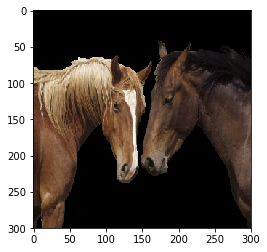

horse-png-5.pngis a human
Input Image Dims: (300, 300, 3)
[0.]
img.PNGis a horse


In [44]:
# Time for some predictions!!!!   Use model_yeehaw for 4 channel images(usually all png files) and model for 3 channel images(jpg,jpeg so on..)
predict_using_model(model_yeehaw)



Let's try to visualize what happens to an Image during a convolution through the layers.

In [0]:
print(train_horses_data[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


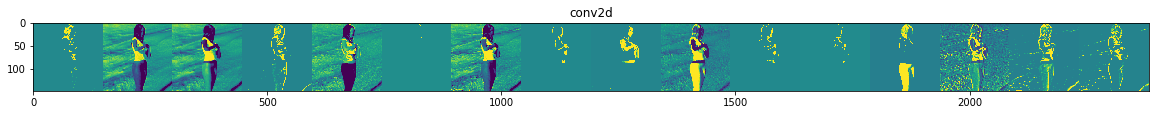

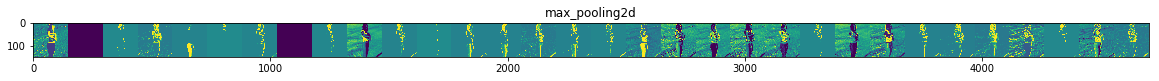

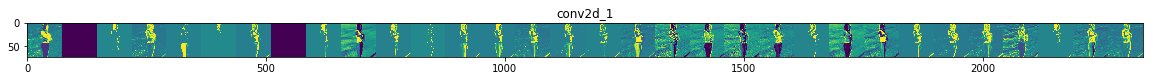

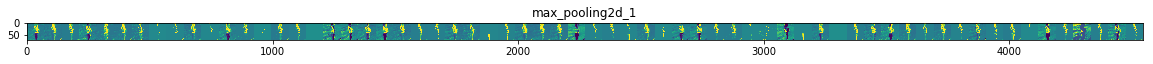

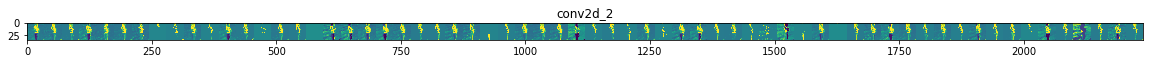

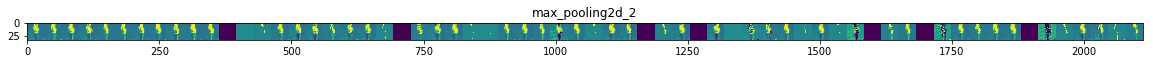

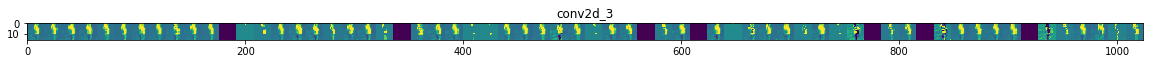

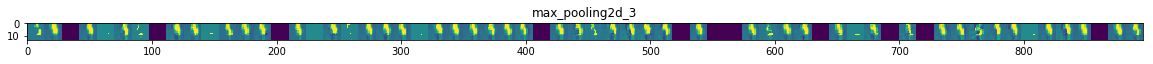

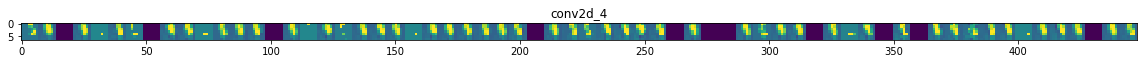

In [17]:
# Must understand the code for visualizing intermediate representations. It's not very clear yet
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(training_horse_directory, f) for f in training_horse_names]
human_img_files = [os.path.join(training_human_directory, f) for f in training_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

At different point during the convolution the model tries to extract out features that a specific neuron focuses on. Later down the convolution we can see that some of the neurons have been shut down by the model. They might not have offered a good enough feature set to be considered in that step.